<a href="https://colab.research.google.com/github/ajdduck/UOS_LinearRegression/blob/master/HW_4_Chapter6_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import math

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("/content/drive/My Drive/grocery_retailer.txt", sep='\t', names=["Y", "X1", "X2", "X3"])
df.head()

,Y,X1,X2,X3
0,4264,305657,7.17,0
1,4496,328476,6.20,0
2,4317,317164,4.61,0
3,4292,366745,7.02,0
4,4945,265518,8.61,1


# ***Q6.10***

Part(a) Y_hat = 4149.8872 + 0.008X1 - 13.1660X2 + 623.5545X3

In [0]:
y = df['Y']
X = df[['X1', 'X2', 'X3']]

X = sm.add_constant(X)

In [0]:
model = sm.OLS(y, X)
results = model.fit()

In [5]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     35.34
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           3.32e-12
Time:                        09:00:33   Log-Likelihood:                -329.88
No. Observations:                  52   AIC:                             667.8
Df Residuals:                      48   BIC:                             675.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4149.8872    195.565     21.220      0.000    3756.677    4543.098
X1             0.0008      0.000      2.159      0.036    5.41e-05       0.002
X2           -13.1660     23.092     -0.570      0.571     -59.595      33.263
X3           623.5545     62.641      9.954      0.000     497.606     749.503
==============================================================================
Omnibus:                        1.532   Durbin-Watson:                   2.298
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                1.504
Skew:                           0.332   Prob(JB):                        0.471
Kurtosis:                       2.496   Cond. No.                     3.04e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.04e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
results_residual = results.resid.to_frame(name="residuals")
results_residual.head()

,residuals
0,-32.063483
1,169.205091
2,-21.825426
3,-54.119552
4,75.933724


Part(b). the Boxplot shows no outlier.

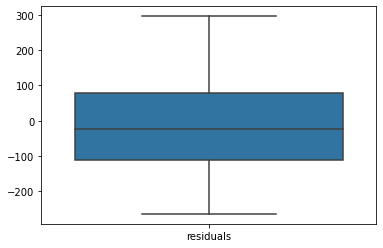

In [7]:
sns.boxplot(data = results_residual)

Part(c). the residual plot against Y_hat shows that the data are largely divided into two parts. That is because X3 is qualitative predictor called holiday(0 or 1). If We refer to the residual plot against X3, we can understand the residual plot against Y_hat well.

Wheras, the Nomal probability plot shows normaility of error terms. If We refer to the correlation value "0.9911684736547595", we can understand the normality of error term well.


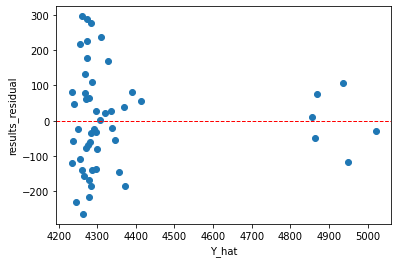

In [8]:
# the residual plot against Y_hat 

plt.scatter(x = results.fittedvalues, y = results.resid)
plt.axhline(y = 0, color = 'red', linestyle = '--', linewidth = 1)
plt.xlabel("Y_hat")
plt.ylabel("results_residual")
plt.show()

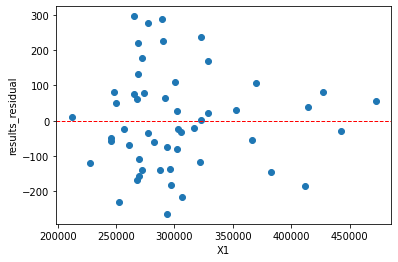

In [9]:
# the residual plot against X1
 
plt.scatter(x = df["X1"], y = results.resid)
plt.axhline(y = 0, color = 'red', linestyle = '--', linewidth = 1)
plt.xlabel("X1")
plt.ylabel("results_residual")
plt.show()

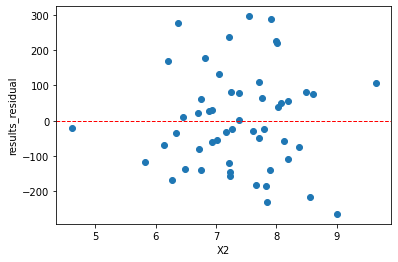

In [10]:
# the residual plot against X2

plt.scatter(x = df["X2"], y = results.resid)
plt.axhline(y = 0, color = 'red', linestyle = '--', linewidth = 1)
plt.xlabel("X2")
plt.ylabel("results_residual")
plt.show()

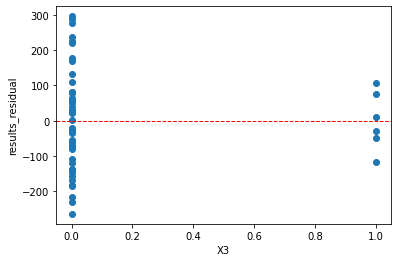

In [11]:
# the residual plot against X3

plt.scatter(x = df["X3"], y = results.resid)
plt.axhline(y = 0, color = 'red', linestyle = '--', linewidth = 1)
plt.xlabel("X3")
plt.ylabel("results_residual")
plt.show()

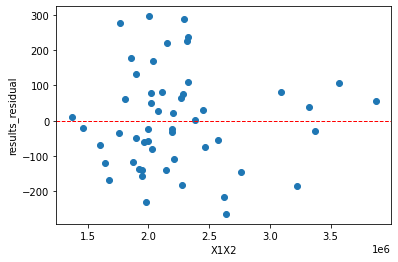

In [12]:
# the residual plot against X1X2

plt.scatter(x = df["X2"]*df["X1"], y = results.resid)
plt.axhline(y = 0, color = 'red', linestyle = '--', linewidth = 1)
plt.xlabel("X1X2")
plt.ylabel("results_residual")
plt.show()

((array([-2.21906046, -1.85036834, -1.63307165, -1.47338453, -1.34433269,
         -1.23445265, -1.1377432 , -1.05064606, -0.97086677, -0.89683292,
         -0.82741562, -0.76177387, -0.69926181, -0.63937059, -0.58169027,
         -0.52588404, -0.47167018, -0.41880907, -0.3670937 , -0.31634247,
         -0.26639369, -0.2171012 , -0.16833095, -0.11995805, -0.0718644 ,
         -0.02393648,  0.02393648,  0.0718644 ,  0.11995805,  0.16833095,
          0.2171012 ,  0.26639369,  0.31634247,  0.3670937 ,  0.41880907,
          0.47167018,  0.52588404,  0.58169027,  0.63937059,  0.69926181,
          0.76177387,  0.82741562,  0.89683292,  0.97086677,  1.05064606,
          1.1377432 ,  1.23445265,  1.34433269,  1.47338453,  1.63307165,
          1.85036834,  2.21906046]),
  array([-264.05302405, -229.05531065, -215.53562892, -184.87762894,
         -183.56597191, -166.98338133, -156.6844008 , -144.90153624,
         -139.28465869, -138.9782707 , -136.69101859, -120.27973216,
         -117.07

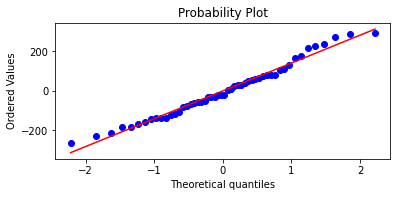

In [13]:
# the Nomal probability plot

fig, ax = plt.subplots(figsize=(6,2.5))
scipy.stats.probplot(results.resid, dist='norm', plot=ax, fit=True)

Part(d). No Correlation.

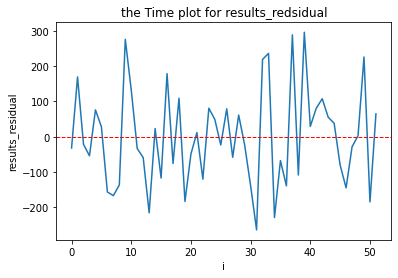

In [14]:
# the time plot of the residuals

plt.plot(results_residual)
plt.axhline(y = 0, color = 'red', linestyle = '--', linewidth = 1)
plt.xlabel("i")
plt.ylabel("results_residual")
plt.title("the Time plot for results_redsidual")
plt.show()

Part(e). Brown-Forthyse Test

t_statistic = 2.9859360416359526

t_critical_value = 2.6777932709408425

"t_statistic > t_critical_value" means the error variance is Not constant.

In [0]:
# Brown-Forthyse 

df_BF = pd.DataFrame({"Y_hat": results.fittedvalues, "residual": results.resid})
df_BF.sort_values(by=['Y_hat'], inplace=True)

In [0]:
df_BF_small = df_BF.copy()
df_BF_small = df_BF_small.iloc[:26, :]

df_BF_big = df_BF.copy()
df_BF_big = df_BF_big.iloc[26:, :]

In [0]:
small_median = df_BF_small["residual"].median()
big_median = df_BF_big["residual"].median()

di_small = abs(df_BF_small['residual'] - small_median)
di_big = abs(df_BF_big['residual'] - big_median)

In [18]:
ttest_result = scipy.stats.ttest_ind(di_small, di_big, equal_var = True)
ttest_result

Ttest_indResult(statistic=2.9859360416359526, pvalue=0.004368743026636409)

In [19]:
t_critical_value = scipy.stats.t.ppf(q=1-0.01/2, df = 50)
t_critical_value

2.6777932709408425

# ***Q6.11***

Part(a).

F_statistics = 35.33703468

F_critical_value = 2.79806063543561

"F_statistics > F_critical_value" means Y ~ X1, X2, X3 have linear relation.

and given that p-value = p=3.3157080087281993e-12, linear relation has more meaning.

In [20]:
# F-test

A = np.identity(len(results.params))
A = A[1:,:]

results.f_test(A)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[35.33703468]]), p=3.3157080087281993e-12, df_denom=48, df_num=3>

In [21]:
F_critical_value = scipy.stats.f.ppf(q = 0.95, dfn = 3, dfd = 48)
F_critical_value

2.79806063543561

Part(b). Bonferroni procedure

Bonferroni joint confidence interval for beta0: 

-5.646079984724967e-05 <= beta1 <= 0.0016306215635241029 

Bonferroni joint confidence interval for beta0:  

478.6096487395398 <= beta3 <= 768.4993127368011

The results show that we are 95% confident that all the 2 CIs contain beta1 and beta2.


In [0]:
# Bonferroni procedure

B_statics = scipy.stats.t.ppf(q=1-0.05/4, df=48)

b1 = results.params[1]
b3 = results.params[3]

s_b1 = results.bse[1]
s_b3 = results.bse[3]

In [23]:
print("Bonferroni joint confidence interval for beta0: ", 
      "\n{} <= beta1 <= {}".format(b1-(B_statics*s_b1), b1+(B_statics*s_b1)),
      "\n\nBonferroni joint confidence interval for beta0: ", 
      "\n{} <= beta3 <= {}".format(b3-(B_statics*s_b3), b3+(B_statics*s_b3)))

Bonferroni joint confidence interval for beta0:  
-5.646079984724967e-05 <= beta1 <= 0.0016306215635241029 

Bonferroni joint confidence interval for beta0:  
478.6096487395398 <= beta3 <= 768.4993127368011


Part(c). 

R_Squared: 0.6883341607166356 means The model is somewhat less descriptive of the data.

In [24]:
print("R_Squared: {}".format(results.rsquared))

R_Squared: 0.6883341607166356


# ***Q6. 13***

In [0]:
x_pred = [[1, 230000, 7.5, 0],
          [1, 250000, 7.3, 0],
          [1, 280000, 7.1, 0],
          [1, 340000, 6.9, 0]]

In [26]:
df_pred = results.get_prediction(x_pred).summary_frame(alpha=0.05)
df_pred

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,4232.170556,34.085608,4163.636849,4300.704263,3936.028570,4528.312541
1,4250.545367,28.302250,4193.639879,4307.450856,3956.876436,4544.214299
2,4276.790983,23.064511,4230.416675,4323.165290,3984.979772,4568.602194
3,4326.649009,27.636050,4271.083006,4382.215013,4033.236693,4620.061326


In [27]:
B_statics = scipy.stats.t.ppf(q=1-0.05/8, df=48)
F_statics = scipy.stats.f.ppf(q=0.95, dfn = 4, dfd =48)
S_statics = math.sqrt(4*F_statics)

print("Bonferroni: {}, \nScheffe: {}".format(B_statics, S_statics))

Bonferroni: 2.595322726383781, 
Scheffe: 3.203273643308694


In [28]:
mse = sum(results.resid**2)/48

for i in range(4):
  Y_hat_new = df_pred.iloc[i, 0]

  s_pred = math.sqrt(mse + df_pred.iloc[i, 1]**2)

  print("Bonferroni Procedure: ", "\n{} <= Y_hat_new <= {}\n".format(Y_hat_new-B_statics*s_pred, Y_hat_new+B_statics*s_pred))

Bonferroni Procedure:  
3849.9111606739584 <= Y_hat_new <= 4614.429951080046

Bonferroni Procedure:  
3871.4781849654128 <= Y_hat_new <= 4629.612549736964

Bonferroni Procedure:  
3900.1217410934437 <= Y_hat_new <= 4653.460224194072

Bonferroni Procedure:  
3947.9130650614734 <= Y_hat_new <= 4705.384953721488

